In this notebook we will try to get best regression results for Walmart dataset (taken from kaggle)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from collections import Counter

In [2]:
mainData = pd.read_csv('train.csv')
extraData = pd.read_csv('feature.csv')
test = pd.read_csv('test.csv')
stores = pd.read_csv('stores.csv')

mainData

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [3]:
mainData.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [4]:
stores.iloc[:5, :]

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
extraData

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [83]:
test

,Store,Dept,IsHoliday,Year,Month,Day
0,1,1,False,2012,11,2
1,1,1,False,2012,11,9
2,1,1,False,2012,11,16
3,1,1,True,2012,11,23
4,1,1,False,2012,11,30
...,...,...,...,...,...,...
115059,45,98,False,2013,6,28
115060,45,98,False,2013,7,5
115061,45,98,False,2013,7,12
115062,45,98,False,2013,7,19


MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
CPI - the consumer price index
Temperature - average temperature in the region

Holidays:
- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
- Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
- Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
- Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [6]:
#A function which takes list of strings in a format yyyy-mm-dd and separate it to year, month and day, convert it to int
def getSeparatedDate(dateList):
    year = [date[:4] for date in dateList]
    month = [date[5:7] for date in dateList]
    day = [date[8:] for date in dateList]
    
    year = np.asarray(year).astype(int)
    month = np.asarray(month).astype(int)
    day = np.asarray(day).astype(int)
    
    return (year, month, day)

getSeparatedDate(['2015-09-15', '2000-01-03'])

(array([2015, 2000]), array([9, 1]), array([15,  3]))

In [7]:
extraData['Year'], extraData['Month'], extraData['Day'] = getSeparatedDate(extraData['Date'].values)
extraData.drop(labels = 'Date', axis = 1, inplace = True)

mainData['Year'], mainData['Month'], mainData['Day'] = getSeparatedDate(mainData['Date'].values)
mainData.drop(labels = 'Date', axis = 1, inplace = True)

test['Year'], test['Month'], test['Day'] = getSeparatedDate(test['Date'].values)
test.drop(labels = 'Date', axis = 1, inplace = True)

We are going to do some basic data analysis with year and month since day shouldn't be significant at all

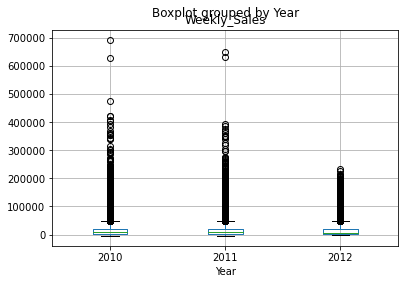

In [8]:
mainData.boxplot(column = 'Weekly_Sales', by = 'Year')
plt.show()

In [9]:
print('The last month of data available in 2012 is ', 
      max(mainData.loc[mainData['Year'] == 2012, 'Month'].values)) 

print('The first month of data available in 2010 is ', 
      min(mainData.loc[mainData['Year'] == 2010, 'Month'].values))

The last month of data available in 2012 is  10
The first month of data available in 2010 is  2


Only 2011 has data available of whole year, therefore sales in 2011 should be highest

In [10]:
year2010 = mainData.loc[mainData['Year'] == 2010, 
                        ['Weekly_Sales']].rename(columns = {'Weekly_Sales' : '2010'}).describe()
year2011 = mainData.loc[mainData['Year'] == 2011, 
                        ['Weekly_Sales']].rename(columns = {'Weekly_Sales' : '2011'}).describe()
year2012 = mainData.loc[mainData['Year'] == 2012, 
                        ['Weekly_Sales']].rename(columns = {'Weekly_Sales' : '2012'}).describe()

yearSalesAnalysis = pd.concat([year2010, year2011, year2012], axis = 1)
yearSalesAnalysis

,2010,2011,2012
count,140679.000000,153453.000000,127438.000000
mean,16270.275737,15954.070675,15694.948597
std,23063.221134,22866.495505,22120.543209
min,-4988.940000,-3924.000000,-1699.000000
25%,2238.330000,2057.050000,1934.535000
50%,7964.300000,7522.020000,7365.095000
75%,20587.205000,20125.400000,19891.970000
max,693099.360000,649770.180000,233140.320000


From year data we can see that although 2010 started from february, its all quartiles are highest same as maximum sum. Probably 2010 has higher sales quartiles than 2011 because in western countries people buy less in January and try to abstain from expensive purchases because they spend lots of money during December for holidays. 2012 year has almost 3 times lower maximum sales sum compared to other years because the data finishes in October while probably lots of yearly revenue is gained in December month. 

In [11]:
monthlyData = []
for month in range(1, 13):
    data = mainData.loc[mainData['Month'] == month, 
                        ['Weekly_Sales']].rename(columns = {'Weekly_Sales' : str(month)}).describe()
    monthlyData.append(data)
    
monthlySalesAnalysis = pd.concat(monthlyData, axis = 1)
monthlySalesAnalysis

,1,2,3,4,5,6,7,8,9,10,11,12
count,23545.000000,35526.000000,38451.000000,41332.000000,35314.000000,38137.000000,40980.000000,38169.000000,38339.000000,38362.000000,23613.000000,29802.000000
mean,14126.075111,16008.779217,15416.657597,15650.338357,15776.337202,16326.137002,15861.419650,16062.516933,15095.886154,15243.855576,17491.031424,19355.702141
std,21220.754522,22925.935446,21646.065918,21625.703256,21626.685866,22082.802440,21704.257869,22155.079986,21439.256090,21334.079444,28461.626189,27729.816839
min,-400.000000,-1750.000000,-1699.000000,-698.000000,-548.000000,-594.000000,-1098.000000,-798.000000,-3924.000000,-4988.940000,-1098.000000,-798.000000
25%,1629.250000,2018.612500,2025.150000,2096.610000,2159.882500,2207.000000,2039.310000,2006.820000,1964.165000,2128.260000,2286.500000,2509.752500
50%,6134.210000,7694.815000,7490.700000,7634.810000,7742.745000,7856.260000,7550.460000,7818.880000,7179.490000,7341.525000,8067.630000,9218.080000
75%,16941.860000,19898.277500,19247.850000,19826.870000,20248.422500,21485.320000,20759.380000,20564.380000,18676.015000,19216.862500,21561.080000,24903.760000
max,206871.520000,293966.050000,214383.070000,224917.940000,206160.360000,206575.900000,198349.170000,241120.000000,214448.960000,221834.280000,693099.360000,406988.630000


From results we can see that December has highest quartile values. November has highest maximum sum, January has lowest mean and smallest standard deviation (meaning it's a bit more stable in sales than other months).

In [12]:
dayData = []
days = sorted(list(Counter(mainData['Day'].values).keys()))
for day in days:
    data = mainData.loc[mainData['Day'] == day, 
                        ['Weekly_Sales']].rename(columns = {'Weekly_Sales' : str(day)}).describe()
    dayData.append(data)
    
dayDataAnalysis = pd.concat(dayData, axis = 1)
dayDataAnalysis

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,11760.000000,14799.000000,14741.000000,14703.000000,14734.000000,14799.000000,11786.000000,11762.000000,14796.000000,14767.000000,...,11766.000000,14801.000000,14741.000000,14753.000000,14746.000000,14680.000000,11752.000000,11736.000000,14752.000000,5905.000000
mean,15438.693561,16282.825224,16243.591840,16262.123390,16152.185352,16540.152518,15851.075764,16026.260550,16563.236628,16684.753968,...,15696.588300,17183.530448,17732.369226,16816.726353,16742.479327,14908.182971,15056.847856,15117.011770,15038.411334,14833.557736
std,21215.454683,22534.051255,22661.855732,22930.507042,23056.553719,23260.729908,22665.252581,22350.985977,23054.140541,23378.977249,...,21353.497352,24972.775001,26339.653783,26546.832338,26866.749132,20744.046951,20993.363702,20418.524928,20491.110623,20305.912513
min,-778.500000,-3924.000000,-705.000000,-219.000000,-798.000000,-182.260000,-298.000000,-4988.940000,-1699.000000,-598.000000,...,-84.000000,-649.000000,-771.900000,-1321.480000,-1750.000000,-450.000000,-400.000000,-409.000000,-1098.000000,-698.000000
25%,2069.187500,2076.060000,2052.850000,2091.450000,2100.192500,2044.555000,1996.085000,2148.310000,2185.855000,2165.430000,...,2119.667500,2209.800000,2242.600000,2135.850000,2176.700000,1869.970000,1988.372500,2033.285000,2037.087500,1890.070000
50%,7400.305000,7750.660000,7652.000000,7711.490000,7757.735000,7785.350000,7424.210000,7602.015000,7829.885000,7926.810000,...,7594.325000,8106.190000,8223.730000,7878.430000,7851.755000,7098.425000,7151.845000,7378.520000,7363.885000,7216.190000
75%,19880.115000,20700.260000,20726.990000,20500.545000,20134.002500,21008.995000,19720.780000,20468.617500,21044.752500,21264.685000,...,20419.240000,21530.940000,22343.330000,20973.340000,20693.167500,19046.940000,18966.197500,19898.905000,19313.052500,19276.870000
max,175473.670000,203457.420000,218559.540000,208504.830000,293966.050000,224917.940000,221834.280000,210596.660000,227088.130000,233140.320000,...,191840.950000,341308.000000,406988.630000,649770.180000,693099.360000,175412.460000,187738.850000,176155.170000,177014.370000,169994.150000


From the table we cannot really say anything special, therefore we will perform one factor ANOVA.

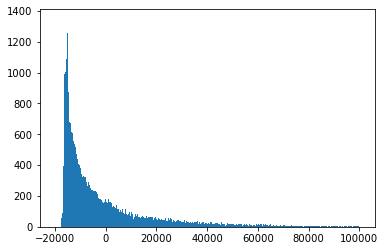

In [13]:
import itertools

dayData = mainData.loc[:, ['Weekly_Sales', 'Day']].sort_values(by = 'Day')
daySumsTotal = []
dayMeans = dayDataAnalysis.loc['mean', :].values
residuals = []

for dayInd in range(len(days)):
    res = dayData.loc[dayData['Day'] == days[dayInd], 'Weekly_Sales'].values - dayMeans[dayInd]
    residuals.append(res)
    
flattenRes = list(itertools.chain(*residuals))

plt.hist(flattenRes, bins = 5000, range = [-20000, 100000])
plt.show()

Above histogram reminds Gaussian distribution to some extent. We know that ANOVA is quite robust against normality assumption. We will check if variances among groups are equal. 

In [14]:
from scipy.stats import levene

stat, p = levene(residuals[0], residuals[1], residuals[2], residuals[3],
                residuals[4], residuals[5], residuals[6], residuals[7],
                residuals[8], residuals[9], residuals[10], residuals[11])
res = "Groups have equal variances" if p > 0.05 else "Groups don't have equal variances"
print(res)

Groups don't have equal variances


Since the groups don't have equal variances, we will apply transoformation. Log and sqrt transformations won't work because data has negative values, therefore we are going to apply 1/x function and then check if groups have equal variance.

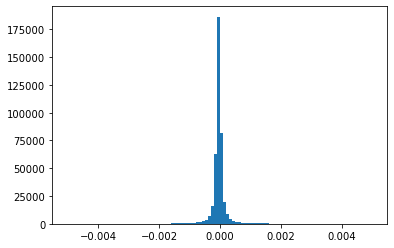

In [15]:
f = lambda x: 1/x
transResiduals = [ np.asarray(list(map(f, dayData))) for dayData in residuals]

flattenTransResiduals = list(itertools.chain(*transResiduals))

plt.hist(flattenTransResiduals, bins = 100, range = [-0.005, 0.005])
plt.show()

Data seems more Gaussian-like after 1/x transformation than before. We will use levene test to check if groups have equal variances. If groups will have equal variances we will apply one-factor ANOVA

In [16]:
stat, p = levene(transResiduals[0], transResiduals[1], transResiduals[2], transResiduals[3],
                transResiduals[4], transResiduals[5], transResiduals[6], transResiduals[7],
                transResiduals[8], transResiduals[9], transResiduals[10], transResiduals[11], transResiduals[12],
                transResiduals[13], transResiduals[14], transResiduals[15], transResiduals[16], transResiduals[17],
                transResiduals[18], transResiduals[19], transResiduals[20], transResiduals[21], transResiduals[22],
                transResiduals[23], transResiduals[24], transResiduals[25], transResiduals[26], transResiduals[27],
                transResiduals[28], transResiduals[29], transResiduals[30])
res = "Groups have equal variances" if p > 0.05 else "Groups don't have equal variances"
print(res)

Groups have equal variances


In [17]:
from scipy.stats import f_oneway

fval, pval = f_oneway(transResiduals[0], transResiduals[1], transResiduals[2], transResiduals[3],
                transResiduals[4], transResiduals[5], transResiduals[6], transResiduals[7],
                transResiduals[8], transResiduals[9], transResiduals[10], transResiduals[11], transResiduals[12],
                transResiduals[13], transResiduals[14], transResiduals[15], transResiduals[16], transResiduals[17],
                transResiduals[18], transResiduals[19], transResiduals[20], transResiduals[21], transResiduals[22],
                transResiduals[23], transResiduals[24], transResiduals[25], transResiduals[26], transResiduals[27],
                transResiduals[28], transResiduals[29], transResiduals[30])

res = "Groups have equal means, p is equal " if pval > 0.05 else "Groups don't have equal means, p is equal "
print(res + str(pval))

Groups have equal means, p is equal 0.5749319887520749


Since groups have equal means while using Day as factor, we won't use the variable to train our model because we need heterogeneous groups not homogeneous

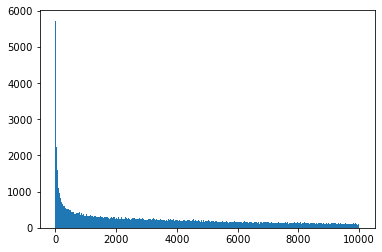

In [18]:
holidayData = mainData['Weekly_Sales'].values
holidayYes = list(mainData.loc[mainData['IsHoliday'] == True, 'Weekly_Sales'])
holidayNo = list(mainData.loc[mainData['IsHoliday'] == False, 'Weekly_Sales'])

plt.hist(holidayData, bins = 1000, range = [-10, 10000])
plt.show()

Since distribution is non-Gaussian we cannot use T test to determine if means across 2 groups are same, therefore we are going to use non-parametric mann whitney u test

In [19]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(holidayYes, holidayNo)
res = "Groups have equal medians, p is equal " if p > 0.05 else "Groups don't have equal medians, p is equal "
print(res + str(p))

Groups don't have equal medians, p is equal 0.0001308643596979472


We will keep variable IsHoliday for our model training since it separates 2 heterogeneous groups

Now we will analyse departments.

In [20]:
depart = mainData.loc[mainData['Store'] == 5, 'Dept']
print('Total departments in store 5 is ', len(Counter(depart)))
print('Each number means specific department', list(Counter(list(depart)).keys())[50:55])

departCounter = Counter(depart)
print("The lowest number of observations 5th store department has is ", min(list(departCounter.values())))

Total departments in store 5 is  72
Each number means specific department [59, 60, 67, 71, 72]
The lowest number of observations 5th store department has is  1


In [21]:
#Find average Weekly_Sales of all departments sort them by increasing order and combine 10 nearest depts together 
#to form another variable 
departIds = list(Counter(mainData['Dept']).keys())
departIdsAverageSales = [np.mean(mainData.loc[mainData['Dept'] == depId, ['Weekly_Sales']].values) for depId in departIds]
print("Total length ", len(departIds))
departIdsAverageSales[:3]

Total length  81


[19213.485087801088, 43607.020113442115, 11793.698515928516]

Regrouping groups: from 81 category we will make 9 categories.

In [22]:
means = []
for key in departIds:
    meanIs = (np.mean(list(mainData.loc[mainData['Dept'] == key, 'Weekly_Sales'])))
    means.append(meanIs)
    
departDf = pd.DataFrame(data = means, index = departIds, columns = ['Mean']).sort_values('Mean')
allGroups = list((departDf.Mean).keys())
departGroups = np.asarray([np.asarray(allGroups[i*9 : i*9+9]) for i in range (9)]).T
names = [ 'Group_' + str(i) for i in range(9)]
newGroups = pd.DataFrame(data = departGroups, columns = names)
newGroups

,Group_0,Group_1,Group_2,Group_3,Group_4,Group_5,Group_6,Group_7,Group_8
0,47,99,85,12,33,55,14,5,91
1,43,28,31,44,98,22,96,79,2
2,78,59,50,6,32,3,82,23,40
3,39,48,35,21,18,80,81,7,90
4,51,27,37,42,67,87,34,4,65
5,45,19,83,20,26,74,10,93,72
6,54,52,58,29,49,16,1,8,38
7,77,41,56,71,25,97,46,13,95
8,60,36,30,24,17,11,9,94,92


In [23]:
newGroupNames = departGroups.T
groupDict = {}

for number in allGroups:
    for i in range(9):
        if number in newGroupNames[i]:
            groupDict[number] = i

In [24]:
#departGroups
mainData['NewDept'] = [ groupDict[dept] for dept in mainData['Dept']]
mainData

,Store,Dept,Weekly_Sales,IsHoliday,Year,Month,Day,NewDept
0,1,1,24924.50,False,2010,2,5,6
1,1,1,46039.49,True,2010,2,12,6
2,1,1,41595.55,False,2010,2,19,6
3,1,1,19403.54,False,2010,2,26,6
4,1,1,21827.90,False,2010,3,5,6
...,...,...,...,...,...,...,...,...
421565,45,98,508.37,False,2012,9,28,4
421566,45,98,628.10,False,2012,10,5,4
421567,45,98,1061.02,False,2012,10,12,4
421568,45,98,760.01,False,2012,10,19,4


In [53]:
#stores
mainData['Size'] = [(stores.loc[stores['Store'] == store, 'Size']).iloc[0]  for store in mainData['Store']]
mainData

,Store,Dept,Weekly_Sales,IsHoliday,Year,Month,Day,NewDept,Size
0,1,1,24924.50,False,2010,2,5,6,151315
1,1,1,46039.49,True,2010,2,12,6,151315
2,1,1,41595.55,False,2010,2,19,6,151315
3,1,1,19403.54,False,2010,2,26,6,151315
4,1,1,21827.90,False,2010,3,5,6,151315
...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,False,2012,9,28,4,118221
421566,45,98,628.10,False,2012,10,5,4,118221
421567,45,98,1061.02,False,2012,10,12,4,118221
421568,45,98,760.01,False,2012,10,19,4,118221


In [54]:
mainData['Type'] = [0 if (stores.loc[stores['Store'] == store, 'Type']).iloc[0] == 'A' else 1  for store in mainData['Store']]
mainData

,Store,Dept,Weekly_Sales,IsHoliday,Year,Month,Day,NewDept,Size,Type
0,1,1,24924.50,False,2010,2,5,6,151315,0
1,1,1,46039.49,True,2010,2,12,6,151315,0
2,1,1,41595.55,False,2010,2,19,6,151315,0
3,1,1,19403.54,False,2010,2,26,6,151315,0
4,1,1,21827.90,False,2010,3,5,6,151315,0
...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,False,2012,9,28,4,118221,1
421566,45,98,628.10,False,2012,10,5,4,118221,1
421567,45,98,1061.02,False,2012,10,12,4,118221,1
421568,45,98,760.01,False,2012,10,19,4,118221,1


In [55]:
print('Total number of obseravtions', len(extraData))
extraData.isnull().sum()

Total number of obseravtions 8190


Store              0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
Year               0
Month              0
Day                0
dtype: int64

In [70]:
mainData['Temperature'] = [extraData.loc[(extraData['Store'] == row[0]) & (extraData['Year'] == row[4]) & (extraData['Month'] == row[5]) & 
                                          (extraData['Day'] == row[6]), 'Temperature'].iloc[0] for row in mainData.values]
mainData

,Store,Dept,Weekly_Sales,IsHoliday,Year,Month,Day,NewDept,Size,Type,Temperature
0,1,1,24924.50,False,2010,2,5,6,151315,0,42.31
1,1,1,46039.49,True,2010,2,12,6,151315,0,38.51
2,1,1,41595.55,False,2010,2,19,6,151315,0,39.93
3,1,1,19403.54,False,2010,2,26,6,151315,0,46.63
4,1,1,21827.90,False,2010,3,5,6,151315,0,46.50
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,False,2012,9,28,4,118221,1,64.88
421566,45,98,628.10,False,2012,10,5,4,118221,1,64.89
421567,45,98,1061.02,False,2012,10,12,4,118221,1,54.47
421568,45,98,760.01,False,2012,10,19,4,118221,1,56.47


In [74]:
mainData['Fuel_Price'] = [extraData.loc[(extraData['Store'] == row[0]) & (extraData['Year'] == row[4]) & (extraData['Month'] == row[5]) & 
                                          (extraData['Day'] == row[6]), 'Fuel_Price'].iloc[0] for row in mainData.values]
mainData['MarkDown1'] = [extraData.loc[(extraData['Store'] == row[0]) & (extraData['Year'] == row[4]) & (extraData['Month'] == row[5]) & 
                                          (extraData['Day'] == row[6]), 'MarkDown1'].iloc[0] for row in mainData.values]
mainData['MarkDown2'] = [extraData.loc[(extraData['Store'] == row[0]) & (extraData['Year'] == row[4]) & (extraData['Month'] == row[5]) & 
                                          (extraData['Day'] == row[6]), 'MarkDown2'].iloc[0] for row in mainData.values]
mainData['MarkDown3'] = [extraData.loc[(extraData['Store'] == row[0]) & (extraData['Year'] == row[4]) & (extraData['Month'] == row[5]) & 
                                          (extraData['Day'] == row[6]), 'MarkDown3'].iloc[0] for row in mainData.values]
mainData['MarkDown4'] = [extraData.loc[(extraData['Store'] == row[0]) & (extraData['Year'] == row[4]) & (extraData['Month'] == row[5]) & 
                                          (extraData['Day'] == row[6]), 'MarkDown4'].iloc[0] for row in mainData.values]
mainData['MarkDown5'] = [extraData.loc[(extraData['Store'] == row[0]) & (extraData['Year'] == row[4]) & (extraData['Month'] == row[5]) & 
                                          (extraData['Day'] == row[6]), 'MarkDown5'].iloc[0] for row in mainData.values]
mainData['CPI'] = [extraData.loc[(extraData['Store'] == row[0]) & (extraData['Year'] == row[4]) & (extraData['Month'] == row[5]) & 
                                          (extraData['Day'] == row[6]), 'CPI'].iloc[0] for row in mainData.values]
mainData['Unemployment'] = [extraData.loc[(extraData['Store'] == row[0]) & (extraData['Year'] == row[4]) & (extraData['Month'] == row[5]) & 
                                          (extraData['Day'] == row[6]), 'Unemployment'].iloc[0] for row in mainData.values]
mainData

,Store,Dept,Weekly_Sales,IsHoliday,Year,Month,Day,NewDept,Size,Type,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,24924.50,False,2010,2,5,6,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,46039.49,True,2010,2,12,6,151315,0,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,41595.55,False,2010,2,19,6,151315,0,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,19403.54,False,2010,2,26,6,151315,0,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,21827.90,False,2010,3,5,6,151315,0,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,False,2012,9,28,4,118221,1,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,628.10,False,2012,10,5,4,118221,1,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,1061.02,False,2012,10,12,4,118221,1,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,760.01,False,2012,10,19,4,118221,1,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [56]:
extraData

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Day
0,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2010,2,5
1,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,2010,2,12
2,1,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,2010,2,19
3,1,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,2010,2,26
4,1,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,2010,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,2013,6,28
8186,45,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,2013,7,5
8187,45,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,2013,7,12
8188,45,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,2013,7,19


In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

rf = RandomForestRegressor(n_estimators = 250, random_state = 0)
scores = cross_val_score(rf, mainData.drop(labels = ['Weekly_Sales','MarkDown1', 'MarkDown2', 'MarkDown3','MarkDown4', 
                                                 'MarkDown5', 'CPI', 'Unemployment'], axis = 1), 
                         mainData['Weekly_Sales'], cv = 10)
np.mean(scores)

0.700418329505568

In [85]:
X = mainData.drop(labels = ['Weekly_Sales','MarkDown1', 'MarkDown2', 'MarkDown3','MarkDown4', 
                                                 'MarkDown5', 'CPI', 'Unemployment'], axis = 1)
y = mainData['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size = 0.1)

rf.fit(X_train, y_train)
print("Score: ", rf.score(X_test, y_test))
print("Feature importance")
print(X.columns)
print(rf.feature_importances_)

Score:  0.9723243636383565
Feature importance
Index(['Store', 'Dept', 'IsHoliday', 'Year', 'Month', 'Day', 'NewDept', 'Size',
       'Type', 'Temperature', 'Fuel_Price'],
      dtype='object')
[0.06907378 0.14203817 0.00430258 0.00216697 0.023121   0.02067458
 0.49391432 0.21142359 0.00804836 0.0168655  0.00837115]


In [99]:
#Creating new variable Holiday:
# 0 - not holiday
# 1 - Super bowl: 2010-02-12, 2011-02-11, 2012-02-10
# 2 - Labor day: 2010-09-10, 2011-09-09, 2012-09-7
# 3 - Thanksgiving: 2010-11-26, 2011-11-25, 2012-11-23
# 4 - Christmas: 2010-12-31, 2011-12-30, 2012-12-28

mainData['Holiday'] = [0 if row[3] is False else (1 if row[5] == 2 else (2 if row[5] == 9 else (3 if  row[5] == 11 else 4))) 
                       for row in mainData.values]
mainData

,Store,Dept,Weekly_Sales,IsHoliday,Year,Month,Day,NewDept,Size,Type,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Holiday
0,1,1,24924.50,False,2010,2,5,6,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
1,1,1,46039.49,True,2010,2,12,6,151315,0,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1
2,1,1,41595.55,False,2010,2,19,6,151315,0,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0
3,1,1,19403.54,False,2010,2,26,6,151315,0,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,0
4,1,1,21827.90,False,2010,3,5,6,151315,0,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,False,2012,9,28,4,118221,1,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,0
421566,45,98,628.10,False,2012,10,5,4,118221,1,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,0
421567,45,98,1061.02,False,2012,10,12,4,118221,1,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,0
421568,45,98,760.01,False,2012,10,19,4,118221,1,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,0


In [ ]:
rf = RandomForestRegressor(n_estimators = 250, random_state = 0)

scores = cross_val_score(rf, mainData.drop(labels = ['Weekly_Sales','MarkDown1', 'MarkDown2', 'MarkDown3','MarkDown4', 
                                                 'MarkDown5', 'CPI', 'Unemployment'], axis = 1), mainData['Weekly_Sales'], cv = 10)

In [106]:
print('RandomForest score after adding new variable Holiday : ', np.mean(scores))

RandomForest score after adding new variable Holiday :  0.6991342178633108


In [158]:
mainData.to_csv('trainDataWithNewFeatures.csv', index = False)

In [107]:
scores = cross_val_score(rf, mainData.drop(labels = ['Weekly_Sales','MarkDown1', 'MarkDown2', 'MarkDown3','MarkDown4', 
                                                 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday', 'Year', 'Fuel_Price'], axis = 1), mainData['Weekly_Sales'], cv = 10)
print('RandomForest score after adding new variable Holiday and deleting IsHoliday, Year, Fuel_Price : ', np.mean(scores))

RandomForest score after adding new variable Holiday and deleting IsHoliday, Year, Fuel_Price :  0.6991320040510679


In [153]:
mainData['CPI'] = [row[17] if row[17] is not np.nan else (np.mean(mainData.loc[mainData['Store'] == row[0], ['CPI']].values)) for row in mainData.values]

In [156]:
scores = cross_val_score(rf, mainData.drop(labels = ['Weekly_Sales','MarkDown1', 'MarkDown2', 'MarkDown3','MarkDown4', 
                                                 'MarkDown5', 'Holiday', 'Unemployment'], axis = 1), mainData['Weekly_Sales'], cv = 10)
print('RandomForest score after adding CPI, removing Holiday : ', np.mean(scores))

RandomForest score after adding CPI, removing Holiday :  0.6979330396271145
